In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [3]:
df = pd.read_excel('../data/Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

#### - Negative Quantity

In [6]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [7]:
df.shape

(541909, 8)

In [8]:
df = df.loc[df['Quantity'] > 0]

In [9]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [10]:
pd.isnull(df['CustomerID']).sum()

133361

In [11]:
df.shape

(531285, 8)

In [12]:
df = df[pd.notnull(df['CustomerID'])]

In [13]:
df.shape

(397924, 8)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [15]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [16]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [17]:
df.shape

(397924, 8)

In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [19]:
df.shape

(380620, 8)

#### - Total Sales

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Order Data

In [22]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [23]:
orders_df

InvoiceDate     Sales
CustomerID InvoiceNo                              
12346.0    541431    2011-01-18 10:01:00  77183.60
12347.0    537626    2010-12-07 14:57:00    711.79
           542237    2011-01-26 14:30:00    475.39
           549222    2011-04-07 10:43:00    636.25
           556201    2011-06-09 13:01:00    382.52
           562032    2011-08-02 08:48:00    584.91
           573511    2011-10-31 12:25:00   1294.32
12348.0    539318    2010-12-16 19:09:00    892.80
           541998    2011-01-25 10:42:00    227.44
           548955    2011-04-05 10:47:00    367.00
           568172    2011-09-25 13:13:00    310.00
12349.0    577609    2011-11-21 09:51:00   1757.55
12350.0    543037    2011-02-02 16:01:00    334.40
12352.0    544156    2011-02-16 12:33:00    296.50
           545323    2011-03-01 14:57:00    144.35
           545332    2011-03-01 15:52:00    840.30
           546869    2011-03-17 16:00:00    120.33
           547390    2011-03-22 16:08:00    160.33
           567505    2011-09-20 14:34:00    366.25
           568699    2011-09-28 14:58:00    266.25
           574275    2011-11-03 14:37:00    311.73
12353.0    553900    2011-05-19 17:47:00     89.00
12354.0    550911    2011-04-21 13:11:00   1079.40
12355.0    552449    2011-05-09 13:49:00    459.40
12356.0    541430    2011-01-18 09:50:00   2271.62
           549435    2011-04-08 12:33:00    481.46
           576895    2011-11-17 08:40:00     58.35
12357.0    574740    2011-11-06 16:07:00   6207.67
12358.0    559707    2011-07-12 10:04:00    484.86
12359.0    540946    2011-01-12 12:43:00    547.50
...                                  ...       ...
18272.0    559813    2011-07-12 15:42:00    753.66
           563680    2011-08-18 12:06:00    372.25
           572617    2011-10-25 11:52:00    604.25
18273.0    547843    2011-03-27 11:22:00     51.00
           565480    2011-09-05 11:27:00    102.00
18274.0    575485    2011-11-09 17:03:00    175.92
18276.0    572990    2011-10-27 10:54:00    335.86
18277.0    570859    2011-10-12 15:22:00    110.38
18278.0    568492    2011-09-27 11:58:00    173.90
18280.0    545712    2011-03-07 09:52:00    180.60
18281.0    556464    2011-06-12 10:53:00     80.82
18282.0    562525    2011-08-05 13:35:00    100.21
18283.0    540350    2011-01-06 14:14:00    108.45
           541854    2011-01-23 14:58:00    106.55
           545079    2011-02-28 10:30:00    102.90
           550957    2011-04-21 16:37:00    117.68
           554157    2011-05-23 11:33:00     99.47
           556731    2011-06-14 11:41:00    103.72
           557956    2011-06-23 19:20:00    203.81
           560025    2011-07-14 13:00:00    140.69
           560032    2011-07-14 13:20:00      2.50
           565579    2011-09-05 12:35:00    134.90
           573093    2011-10-27 14:38:00    114.65
           575668    2011-11-10 14:59:00    112.35
           575675    2011-11-10 15:07:00      1.95
           578262    2011-11-23 13:27:00    313.65
           579673    2011-11-30 12:59:00    223.61
18287.0    554065    2011-05-22 10:39:00    765.28
           570715    2011-10-12 10:23:00   1001.32
           573167    2011-10-28 09:29:00     70.68

[17758 rows x 2 columns]

# 3. Data Analysis

In [24]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return int((x.max() - x.min()).days)

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [25]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [26]:
purchase_duration(orders_df['InvoiceDate'][12347.0])

327

In [27]:
# Scannell note: I was having datatype problems here, so force it to be an int
summary_df['InvoiceDate','purchase_duration'] = summary_df['InvoiceDate','purchase_duration'].astype(int)
summary_df['InvoiceDate','purchase_frequency'] = summary_df['InvoiceDate','purchase_frequency'].astype(int)

In [28]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [29]:
summary_df

,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency,sales_min,sales_max,sales_sum,sales_avg,sales_count
CustomerID,,,,,,,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0,77183.60,77183.60,77183.60,77183.600000,1.0
12347.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54,382.52,1294.32,4085.18,680.863333,6.0
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70,227.44,892.80,1797.24,449.310000,4.0
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0,1757.55,1757.55,1757.55,1757.550000,1.0
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0,334.40,334.40,334.40,334.400000,1.0
12352.0,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32,120.33,840.30,2506.04,313.255000,8.0
12353.0,2011-05-19 17:47:00,2011-05-19 17:47:00,0,0,89.00,89.00,89.00,89.000000,1.0
12354.0,2011-04-21 13:11:00,2011-04-21 13:11:00,0,0,1079.40,1079.40,1079.40,1079.400000,1.0
12355.0,2011-05-09 13:49:00,2011-05-09 13:49:00,0,0,459.40,459.40,459.40,459.400000,1.0


In [30]:
summary_df.shape

(4298, 9)

In [31]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [32]:
summary_df.shape

(2692, 9)

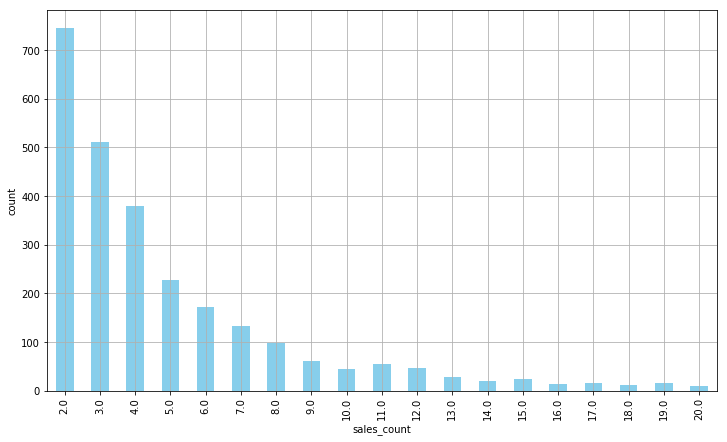

In [33]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [34]:
summary_df['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [35]:
summary_df['sales_avg'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_avg, dtype: float64

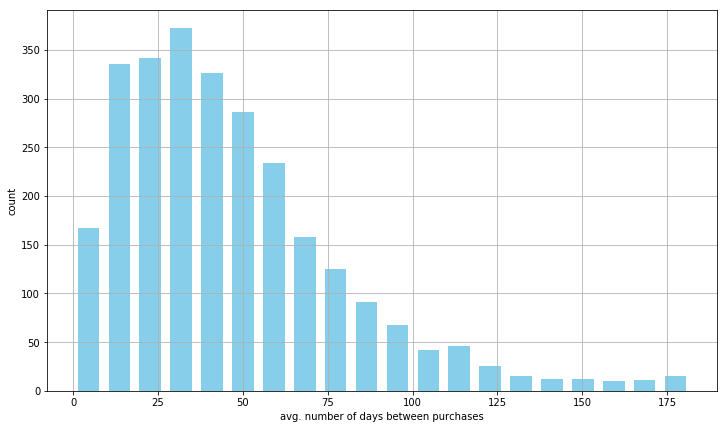

In [36]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [37]:
summary_df['invoicedate_purchase_frequency'].describe()

count    2692.000000
mean       46.635958
std        32.426856
min         0.000000
25%        23.000000
50%        40.000000
75%        62.000000
max       182.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [38]:
summary_df['invoicedate_purchase_duration'].describe()

count    2692.000000
mean      199.720282
std       107.816559
min         1.000000
25%       107.000000
50%       209.000000
75%       296.000000
max       364.000000
Name: invoicedate_purchase_duration, dtype: float64

# 4. Predicting 3-Month CLV

## 4.1. Data Preparation

In [39]:
clv_freq = '3M'

In [40]:
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

In [41]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [42]:
data_df = data_df.reset_index()

In [43]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0
5,12347.0,2011-12-31,1294.32,1294.320,1.0
6,12348.0,2010-12-31,892.80,892.800,1.0
7,12348.0,2011-03-31,227.44,227.440,1.0
8,12348.0,2011-06-30,367.00,367.000,1.0
9,12348.0,2011-09-30,310.00,310.000,1.0


In [44]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [45]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [46]:
date_month_map

{'2010-12-31': 'M_5',
 '2011-03-31': 'M_4',
 '2011-06-30': 'M_3',
 '2011-09-30': 'M_2',
 '2011-12-31': 'M_1'}

In [47]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
6,12348.0,2010-12-31,892.80,892.800,1.0,M_5
7,12348.0,2011-03-31,227.44,227.440,1.0,M_4
8,12348.0,2011-06-30,367.00,367.000,1.0,M_3
9,12348.0,2011-09-30,310.00,310.000,1.0,M_2


#### - Building Sample Set

In [48]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

In [49]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [50]:
features_df.shape

(3616, 12)

In [51]:
features_df.head(10)

,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.60,NaN,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN
12347.0,584.91,1018.77,475.39,711.79,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0
12348.0,310.00,367.00,227.44,892.80,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0
12350.0,NaN,NaN,334.40,NaN,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN
12352.0,632.50,NaN,1561.81,NaN,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN
12353.0,NaN,89.00,NaN,NaN,NaN,89.000,NaN,NaN,NaN,1.0,NaN,NaN
12354.0,NaN,1079.40,NaN,NaN,NaN,1079.400,NaN,NaN,NaN,1.0,NaN,NaN
12355.0,NaN,459.40,NaN,NaN,NaN,459.400,NaN,NaN,NaN,1.0,NaN,NaN
12356.0,NaN,481.46,2271.62,NaN,NaN,481.460,2271.620,NaN,NaN,1.0,1.0,NaN


In [52]:
features_df = features_df.fillna(0)

In [53]:
features_df.head()

,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.00,77183.60,0.00,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0
12347.0,584.91,1018.77,475.39,711.79,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0
12348.0,310.00,367.00,227.44,892.80,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0
12350.0,0.00,0.00,334.40,0.00,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0
12352.0,632.50,0.00,1561.81,0.00,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0


In [54]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

In [55]:
response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

In [56]:
response_df.shape

(2407, 2)

In [57]:
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [58]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

In [59]:
sample_set_df.shape

(3616, 14)

In [60]:
sample_set_df.head(10)

,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,CustomerID,CLV_3M
9219,0.00,0.00,77183.60,0.00,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,12346.0,NaN
5,584.91,1018.77,475.39,711.79,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,12347.0,1294.32
9219,310.00,367.00,227.44,892.80,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,12348.0,NaN
9219,0.00,0.00,334.40,0.00,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,12350.0,NaN
14,632.50,0.00,1561.81,0.00,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,12352.0,311.73
9219,0.00,89.00,0.00,0.00,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,12353.0,NaN
9219,0.00,1079.40,0.00,0.00,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,12354.0,NaN
9219,0.00,459.40,0.00,0.00,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,12355.0,NaN
20,0.00,481.46,2271.62,0.00,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,12356.0,58.35
9219,484.86,0.00,0.00,0.00,484.86,0.000,0.000,0.00,1.0,0.0,0.0,0.0,12358.0,NaN


In [61]:
sample_set_df = sample_set_df.fillna(0)

In [62]:
sample_set_df.head()

,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,CustomerID,CLV_3M
9219,0.00,0.00,77183.60,0.00,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,12346.0,0.00
5,584.91,1018.77,475.39,711.79,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,12347.0,1294.32
9219,310.00,367.00,227.44,892.80,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,12348.0,0.00
9219,0.00,0.00,334.40,0.00,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,12350.0,0.00
14,632.50,0.00,1561.81,0.00,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,12352.0,311.73


In [63]:
sample_set_df['CLV_'+clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

## 4.2. Regression Models

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

#### - Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression

# Try these models as well
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [68]:
reg_fit = LinearRegression()

In [69]:
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
reg_fit.intercept_

108.44400981349173

In [71]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_sum_M_2,0.184086
1,sales_sum_M_3,0.383306
2,sales_sum_M_4,0.363418
3,sales_sum_M_5,0.829009
4,sales_avg_M_2,0.169926
5,sales_avg_M_3,-0.540072
6,sales_avg_M_4,-0.324988
7,sales_avg_M_5,-0.421698
8,sales_count_M_2,106.325721
9,sales_count_M_3,-25.098798


## 4.3. Evaluation

In [72]:
from sklearn.metrics import r2_score, median_absolute_error

In [73]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-Squared

In [74]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.8259
Out-of-Sample R-Squared: 0.4346


#### - Median Absolute Error

In [75]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 207.0019
Out-of-Sample MSE: 232.5312


#### - Scatter Plot

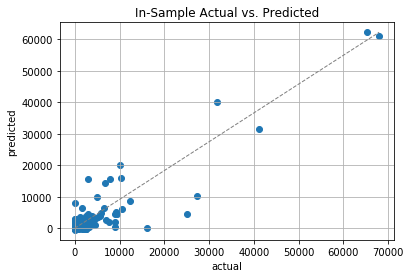

In [76]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

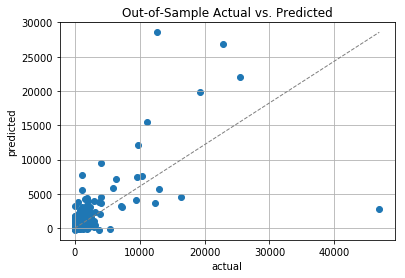

In [77]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()